<a href="https://colab.research.google.com/github/ovi0184/My_work/blob/main/Diabetes_risk_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Required Libraries**

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

# **Loading Dataset**

In [45]:
data=pd.read_csv("/content/Diabetes_risk_prediction_final_project02.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Basic Data Information**

<Axes: xlabel='Outcome'>

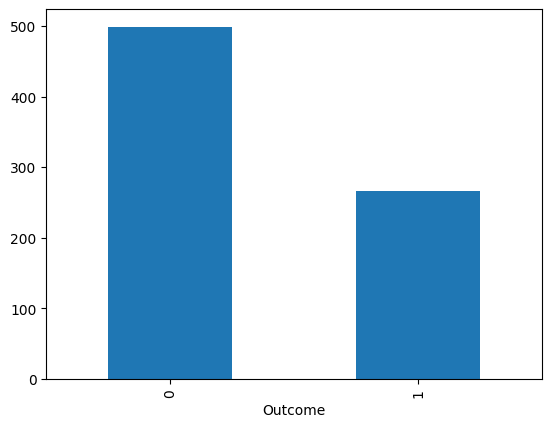

In [50]:
data["Outcome"].value_counts().plot(kind="bar")

# **Checking For Missing values**

In [51]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

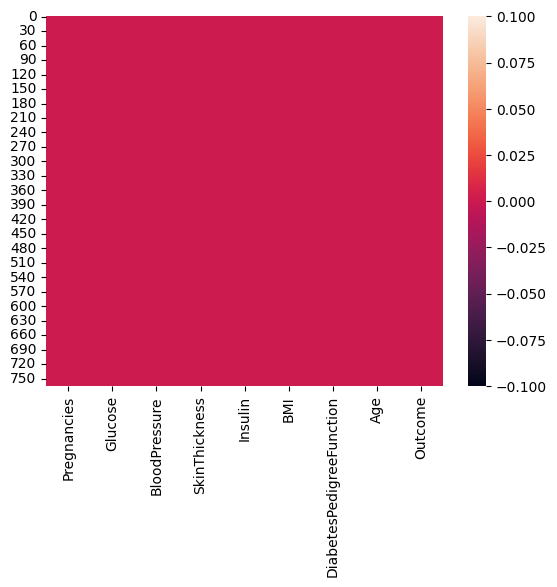

In [32]:
sns.heatmap(data.isnull())

# **Co-relation Matrix**

In [33]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128858       0.140966      -0.082558   
Glucose                      0.128858  1.000000       0.152840       0.058451   
BloodPressure                0.140966  0.152840       1.000000       0.206853   
SkinThickness               -0.082558  0.058451       0.206853       1.000000   
Insulin                     -0.075180  0.331089       0.088618       0.437080   
BMI                          0.017212  0.221018       0.281729       0.392903   
DiabetesPedigreeFunction    -0.034495  0.136978       0.041081       0.184003   
Age                          0.545937  0.262780       0.240667      -0.111568   
Outcome                      0.223154  0.466435       0.066063       0.077898   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.075180  0.017212                 -0.034495   
Glucose                   0.331089  0.221

<Axes: >

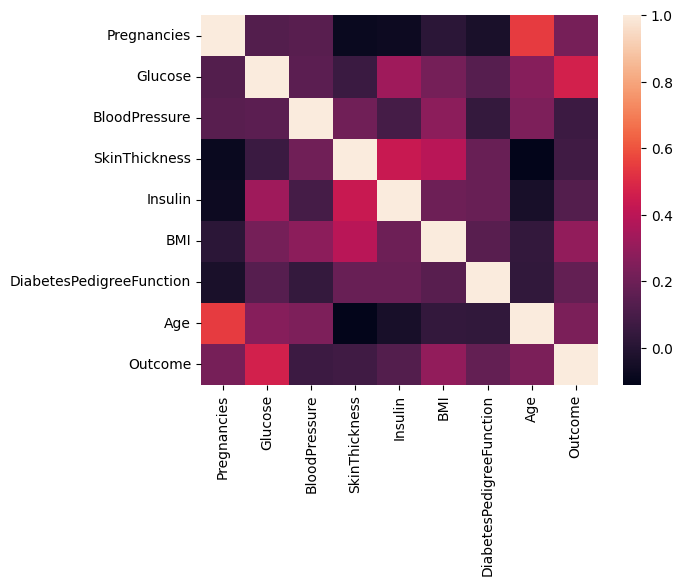

In [34]:
sns.heatmap(correlation)

# **Train Test & Split**

In [35]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
762,9,89,62,0,0,22.5,0.142,33
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27


In [36]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
761    1
762    0
763    0
764    0
765    0
Name: Outcome, Length: 766, dtype: int64

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
66,0,109,88,30,0,32.5,0.855,38
402,5,136,84,41,88,35.0,0.286,35
739,1,102,74,0,0,39.5,0.293,42
429,1,95,82,25,180,35.0,0.233,43
203,2,99,70,16,44,20.4,0.235,27
...,...,...,...,...,...,...,...,...
626,0,125,68,0,0,24.7,0.206,21
705,6,80,80,36,0,39.8,0.177,28
618,9,112,82,24,0,28.2,1.282,50
175,8,179,72,42,130,32.7,0.719,36


# **Training The Model**

In [68]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Making Prediction**

In [69]:
predictions = model.predict(X_test)
print(predictions)

[1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0]


# **Evaluation**

In [70]:
accuracy = accuracy_score(predictions,y_test)
print(accuracy)

0.7662337662337663
